In [37]:
!pip3 install git+https://github.com/pandas-profiling/pandas-profiling

  Cloning https://github.com/pandas-profiling/pandas-profiling to /tmp/pip-req-build-hqnzs9yj
  Running command git clone -q https://github.com/pandas-profiling/pandas-profiling /tmp/pip-req-build-hqnzs9yj
     |████████████████████████████████| 614kB 7.6MB/s 
     |████████████████████████████████| 225kB 42.3MB/s 
     |████████████████████████████████| 768kB 47.4MB/s 
     |████████████████████████████████| 51kB 23.0MB/s 
     |████████████████████████████████| 194kB 46.4MB/s 
     |████████████████████████████████| 737kB 44.9MB/s 
     |████████████████████████████████| 51kB 21.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=144604 sha256=b10327d8a7dd1c45ee1f16f255e9b81fcc9a6e2f0baa6d7e78ece97399c3e3b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-otz4lfg4/wheels/f6/63/e9/7b73144898d5a86888d0aa64c7e40380163edf0c695cd5bf6a
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=2fd1b476b222360

In [100]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

import warnings
warnings.filterwarnings("ignore")

In [6]:
path_to_ds = '/content/drive/My Drive/folder/dataset_file.csv'
apartments_df = pd.read_csv(path_to_ds)
print(f'Dataset shape is {apartments_df.shape}')
apartments_df.head()

Dataset shape is (27810, 35)


building_condition  ...                          water
0  чешка нормальное железобетонное  ...  централизованное (водопровод)
1                              NaN  ...                            NaN
2                              NaN  ...                            NaN
3                              NaN  ...                            NaN
4                              NaN  ...                            NaN

[5 rows x 35 columns]

In [7]:
apartments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27810 entries, 0 to 27809
Data columns (total 35 columns):
building_condition         684 non-null object
city_name                  27810 non-null object
construction_year          3753 non-null object
description                27582 non-null object
dist_to_airport            327 non-null object
dist_to_bus_terminal       336 non-null object
dist_to_center             450 non-null object
dist_to_hospital           374 non-null object
dist_to_kindergarten       481 non-null object
dist_to_parking            405 non-null object
dist_to_railway_station    363 non-null object
dist_to_rest_area          460 non-null object
dist_to_school             475 non-null object
dist_to_shop               456 non-null object
district_name              26208 non-null object
elevators_count            27810 non-null int64
floor                      27810 non-null object
heating                    27702 non-null object
is_verified_flat           27810 

In [60]:
square_meters = apartments_df['total_square_meters'].mean()
price_usd = apartments_df['price_usd'].mean()
elevators_count = apartments_df['elevators_count'].mean()
print(f'At mean we have %d total m^2 apartments that costs %d$ with %d elevators ' % (square_meters, price_usd, elevators_count))

At mean we have 98 total m^2 apartments that costs 105309$ with 0 elevators 


In [45]:
apartments_df['title_len'] = apartments_df['title'].map(str).apply(len)
apartments_df['desc_len'] = apartments_df['description'].map(str).apply(len)
mean_title_len = apartments_df['title_len'].value_counts().mean()
mean_desc_len = apartments_df['desc_len'].value_counts().mean()
print('Mean title length is %d, mean description length is %d' % (mean_title_len, mean_desc_len))

Mean title length is 295, mean description length is 15


In [54]:
apartments_df['photos_len'] = apartments_df['photos'].map(lambda photos_repr: len(photos_repr.strip('][').replace("'", "").split(', ')))
print('At mean we have %d photos of apartments' % round(apartments_df['photos_len'].mean()))

At mean we have 10 photos of apartments


In [0]:
russian_stopwords = stopwords.words("russian")

In [104]:
# description most common words
apartments_df = apartments_df.fillna('')
apartments_df['desc_words'] = apartments_df['description'].str.strip().str.split('[\W_]+')
words = []
for row in apartments_df['desc_words'].tolist():
    for word in row:
      word = word.lower()
      if word not in russian_stopwords and word.strip() != '' and word.isalpha() and len(word) > 3:
          words.append(word)
counter_most_common = Counter(words).most_common(100)
counter_most_common

[('квартира', 30885),
 ('метро', 15378),
 ('рядом', 13984),
 ('кухня', 10821),
 ('дома', 10807),
 ('окна', 10247),
 ('ремонт', 9359),
 ('квартиры', 8873),
 ('инфраструктура', 8217),
 ('квартиру', 8215),
 ('минут', 8150),
 ('площадь', 7774),
 ('квартире', 7231),
 ('компании', 7100),
 ('сайте', 6987),
 ('объявления', 6936),
 ('школа', 6872),
 ('парк', 6838),
 ('развязка', 6680),
 ('транспортная', 6522),
 ('продажа', 6244),
 ('доме', 6188),
 ('пешком', 6027),
 ('номер', 5903),
 ('балкон', 5571),
 ('продается', 5463),
 ('ремонтом', 5266),
 ('этаж', 5179),
 ('планировка', 4907),
 ('продам', 4906),
 ('школы', 4874),
 ('счетчики', 4822),
 ('комнаты', 4737),
 ('двор', 4660),
 ('магазины', 4488),
 ('детские', 4364),
 ('паркинг', 4232),
 ('доступности', 4180),
 ('район', 4114),
 ('этаже', 4059),
 ('очень', 4050),
 ('общая', 3968),
 ('пешей', 3928),
 ('детский', 3829),
 ('бойлер', 3744),
 ('удобная', 3731),
 ('комплекс', 3679),
 ('мебель', 3655),
 ('комнатная', 3642),
 ('санузел', 3597),
 ('разви

In [107]:
apartments_df['title_words'] = apartments_df['title'].str.strip().str.split('[\W_]+')
title_words = []
for row in apartments_df['title_words'].tolist():
    for word in row:
      word = word.lower()
      if word not in russian_stopwords and word.strip() != '' and word.isalpha() and len(word) > 3:
          title_words.append(word)
title_most_common = Counter(title_words).most_common(100)
title_most_common

[('продаю', 27806),
 ('квартиру', 27806),
 ('киеве', 27803),
 ('районе', 26202),
 ('улица', 11450),
 ('возле', 10548),
 ('метро', 10548),
 ('дарницкий', 5376),
 ('голосеевский', 3923),
 ('печерский', 3183),
 ('шевченковский', 2757),
 ('соломенский', 2559),
 ('днепровский', 2358),
 ('оболонский', 2180),
 ('проспект', 1775),
 ('святошинский', 1568),
 ('академика', 1499),
 ('подольский', 1497),
 ('деснянский', 1156),
 ('позняки', 1100),
 ('осокорки', 965),
 ('героев', 722),
 ('днепровская', 706),
 ('чавдар', 662),
 ('набережная', 651),
 ('гмыри', 610),
 ('николая', 579),
 ('бориса', 577),
 ('глушкова', 527),
 ('левобережная', 506),
 ('васильковская', 498),
 ('єлизавети', 487),
 ('василия', 462),
 ('маршала', 456),
 ('бульвар', 452),
 ('вокзальная', 448),
 ('ивана', 436),
 ('лукьяновская', 428),
 ('сталинграда', 425),
 ('петра', 418),
 ('оболонь', 403),
 ('минская', 402),
 ('дружбы', 394),
 ('народов', 394),
 ('драгоманова', 376),
 ('дворец', 352),
 ('шоссе', 344),
 ('генерала', 343),
 ('х

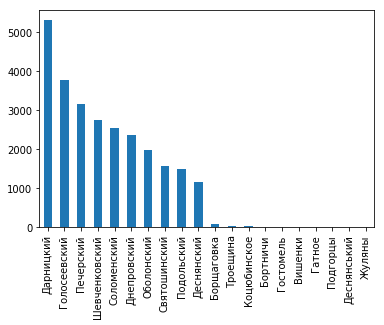

In [11]:
apartments_df['district_name'].value_counts().plot(kind='bar')

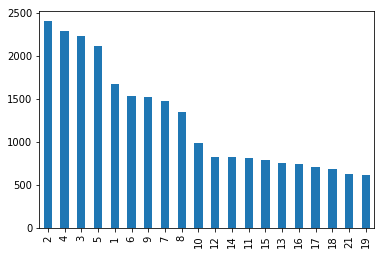

In [22]:
apartments_df['floor'].value_counts(sort=True)[:20].plot('bar')

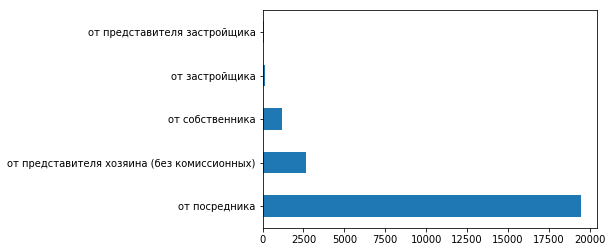

In [36]:
apartments_df['seller'].value_counts().plot('barh')

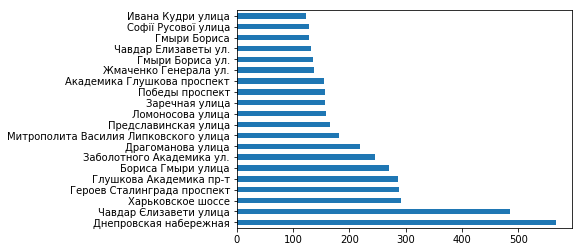

In [34]:
apartments_df['street_name'].value_counts(sort=True)[:20].plot('barh')

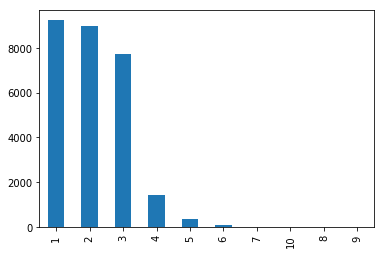

In [33]:
apartments_df['rooms_count'].value_counts(sort=True)[:10].plot('bar')

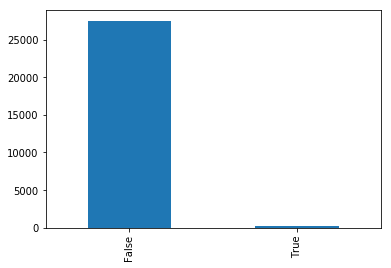

In [59]:
# got only 278 verified flats
apartments_df['is_verified_flat'].value_counts().plot(kind='bar')

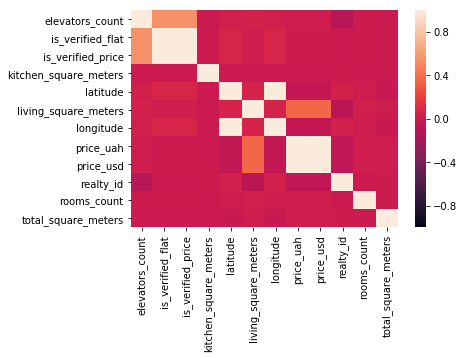

In [9]:
sns.heatmap(apartments_df.corr(), vmin=-1, vmax=1)

In [8]:
apartments_df.profile_report()